# Scale

In [1]:
import pandas as pd

# method를 사용하면 inplace를 TRUE를 해줘야지 데이터프레임이 변경된다.
df = pd.DataFrame(['D','C-','C+','B-','B','B+','A-','A','A+'],
                 index = ['poor','ok','ok','good','good','good','excellent','excellent','excellent'])
df.rename(columns={0:'Grades'}, inplace = True)
df

,Grades
poor,D
ok,C-
ok,C+
good,B-
good,B
good,B+
excellent,A-
excellent,A
excellent,A+


In [2]:
# ordinal scale
# pandas type이라는 모듈을 가져와야한다
# astype으로변환하는데 categorical 데이터 타입을 이용한다.
# 카테고리컬 데이터 타입으로 astype을 이용하여 바꿨다.
# 지금 이건 norminal scale
from pandas.api.types import CategoricalDtype
grades = df['Grades'].astype(CategoricalDtype(categories = ['D','C-','C+','B-','B','B+','A-','A','A+']))
grades.head()

poor     D
ok      C-
ok      C+
good    B-
good     B
Name: Grades, dtype: category
Categories (9, object): [D, C-, C+, B-, ..., B+, A-, A, A+]

In [3]:
# ordered 파라미터로 순서를 정해줄 수 있다.
# norminal -> Ordered Scale로 변했다
grades = df['Grades'].astype(CategoricalDtype(categories = ['D','C-','C+','B-','B','B+','A-','A','A+'], ordered = True))
grades

poor          D
ok           C-
ok           C+
good         B-
good          B
good         B+
excellent    A-
excellent     A
excellent    A+
Name: Grades, dtype: category
Categories (9, object): [D < C- < C+ < B- ... B+ < A- < A < A+]

In [4]:
# ordered scalse 에서 데이터 쿼링
grades > 'B'

poor         False
ok           False
ok           False
good         False
good         False
good          True
excellent     True
excellent     True
excellent     True
Name: Grades, dtype: bool

In [5]:
# categorization of ratio scaled data
s = pd.Series([168,180,174,190,185,179,181,170,175,169,182,177,180,171])
s.head()

0    168
1    180
2    174
3    190
4    185
dtype: int64

In [6]:
# 카테고리를 3개로 나누겠다.
pd.cut(s,3)

0     (167.978, 175.333]
1     (175.333, 182.667]
2     (167.978, 175.333]
3       (182.667, 190.0]
4       (182.667, 190.0]
5     (175.333, 182.667]
6     (175.333, 182.667]
7     (167.978, 175.333]
8     (167.978, 175.333]
9     (167.978, 175.333]
10    (175.333, 182.667]
11    (175.333, 182.667]
12    (175.333, 182.667]
13    (167.978, 175.333]
dtype: category
Categories (3, interval[float64]): [(167.978, 175.333] < (175.333, 182.667] < (182.667, 190.0]]

In [7]:
# 카테고리 이름 붙이기
# 카테고라이즈 된 데이터들을 ordered 나 norminal등 다양한 형태로 사용한다.
pd.cut(s,3,labels = ['Small','Medium','Large'])

0      Small
1     Medium
2      Small
3      Large
4      Large
5     Medium
6     Medium
7      Small
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

# Basic Plot with matplotlib

In [8]:
# visualization
# 백엔드 명령어는 맷플립을 백그라운드에서 실행 유지시켜준다
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [9]:
import matplotlib.pyplot as plt
plt.plot?

Scatter Chart

<IPython.core.display.Javascript object>


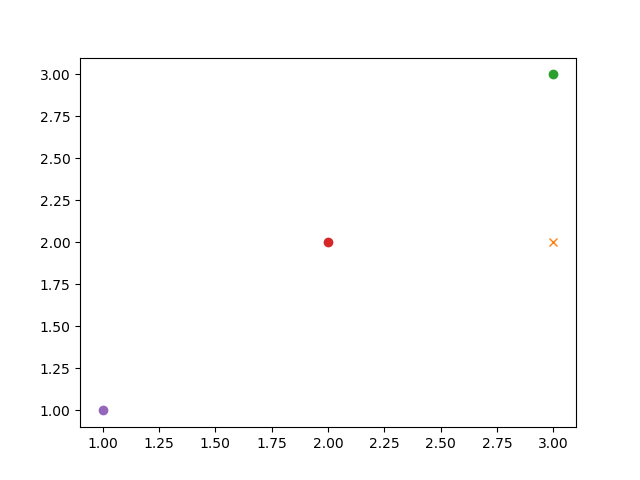

In [10]:

# 결과가 출력되었지만 그림상에서 확인불가능 
plt.plot(3,2)

In [11]:
# 마킹을 어떻게 할건지 설정해준다
plt.plot(3,2,'x')

In [12]:
# 데이터 추가
plt.plot(3,3,'o')
plt.plot(2,2,'o')
plt.plot(1,1,'o')

<IPython.core.display.Javascript object>


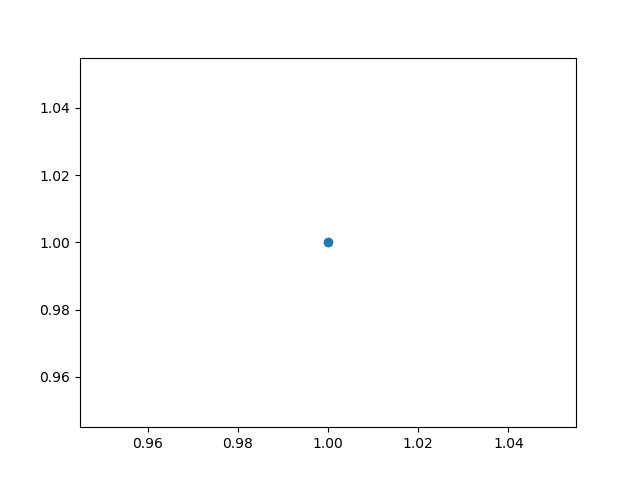

<IPython.core.display.Javascript object>


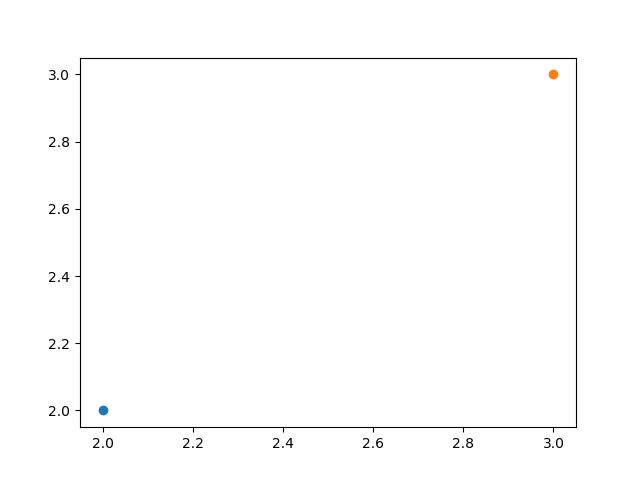

In [13]:
# figure을 이용해 각각 플로팅한다.
plt.figure()
plt.plot(1,1,'o')
plt.figure()
plt.plot(2,2,'o')
plt.plot(3,3,'o')

<IPython.core.display.Javascript object>


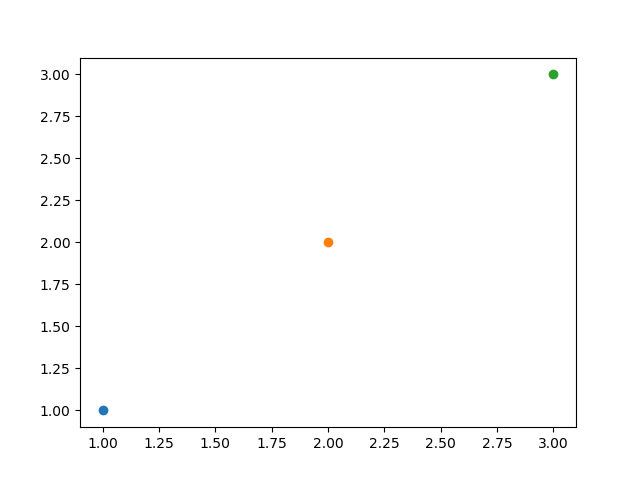

In [14]:
plt.figure()
plt.plot(1,1,'o')
plt.plot(2,2,'o')
plt.plot(3,3,'o')

<IPython.core.display.Javascript object>


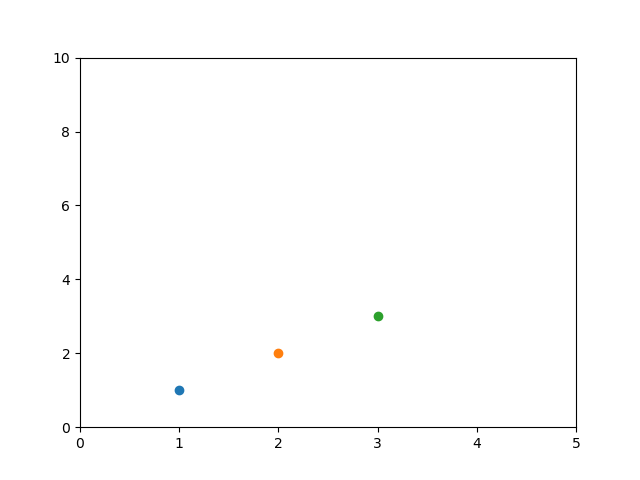

[0, 5, 0, 10]

In [15]:
# get current axis, axis(크기)가 가리키는 주소를 받아옴
# axis _스케일을 바꾼다
plt.figure()
plt.plot(1,1,'o')
plt.plot(2,2,'o')
plt.plot(3,3,'o')
ax = plt.gca()
ax.axis([0,5,0,10])

<IPython.core.display.Javascript object>


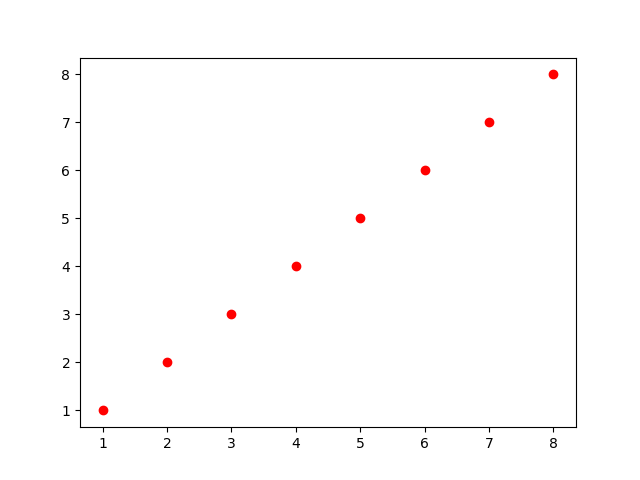

In [16]:
# 점의 색을 바꿀 수 있다. ( r ,g b 문자를 붙이면 된다)
import numpy as np
x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.plot(x,y,'or')

<IPython.core.display.Javascript object>


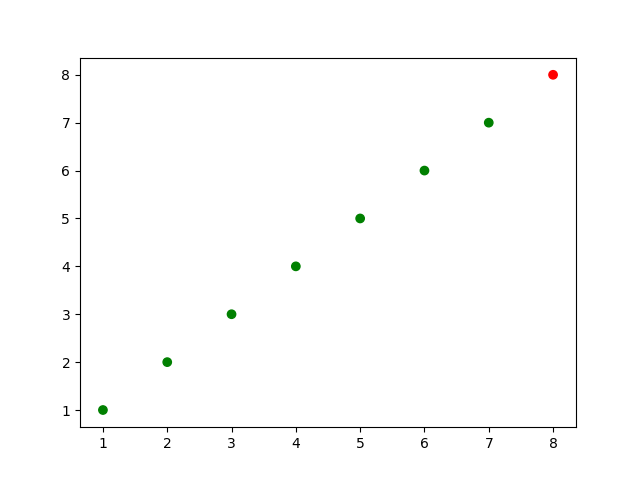

In [17]:
# 색을 다양한 조건으로 바꾸기
colors=['green'] * (len(x)-1)
colors.append('red')

plt.figure()
plt.scatter(x,y,c=colors)

<IPython.core.display.Javascript object>


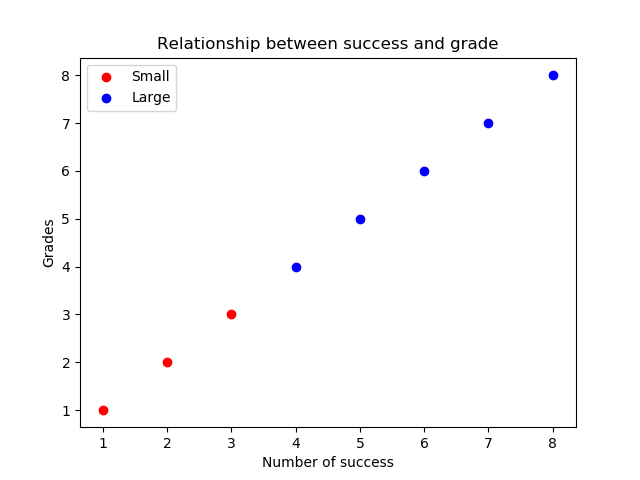

In [18]:
plt.figure()

plt.scatter(x[:3],y[:3],c='red', label ='Small')
plt.scatter(x[3:],y[3:],c='blue', label = 'Large')

# 라벨 이름 바꾸기
plt.xlabel('Number of success')
plt.ylabel('Grades')

# 타이틀 바꾸기
plt.title('Relationship between success and grade')

# 범례
plt.legend()

# Line Plots

In [19]:
linear_data = x
linear_data

array([1, 2, 3, 4, 5, 6, 7, 8])

<IPython.core.display.Javascript object>


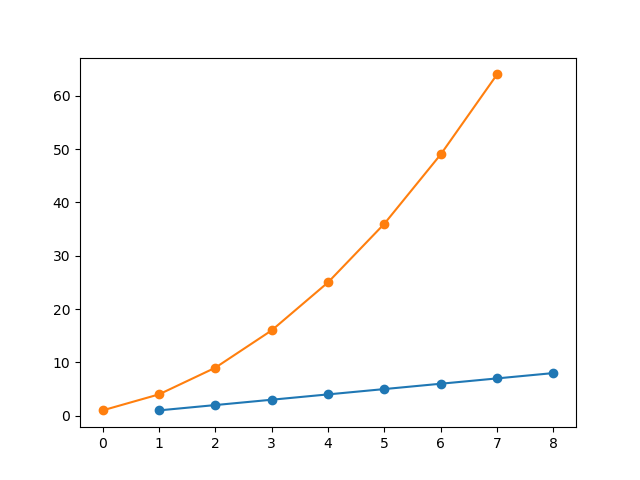

In [20]:
# 선형 plot
# 파라미터로 라인의 종류를 바꿀 수 있다.
exponential_data = linear_data**2

plt.figure()
#plt.plot(linear_data,'-.o',exponential_data, '--o')
plt.plot(x,linear_data,'-o',exponential_data, '-o')

<IPython.core.display.Javascript object>


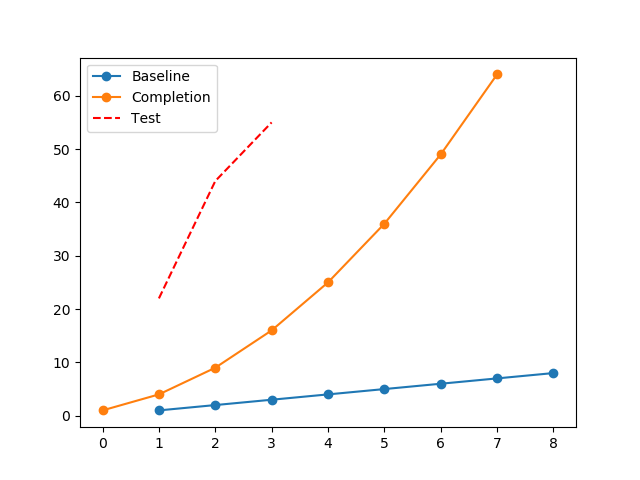

In [21]:
plt.figure()
plt.plot(x,linear_data,'-o',exponential_data, '-o')
plt.plot(x[:3],[22,44,55],'--r')
plt.legend(['Baseline','Completion','Test'])

<IPython.core.display.Javascript object>


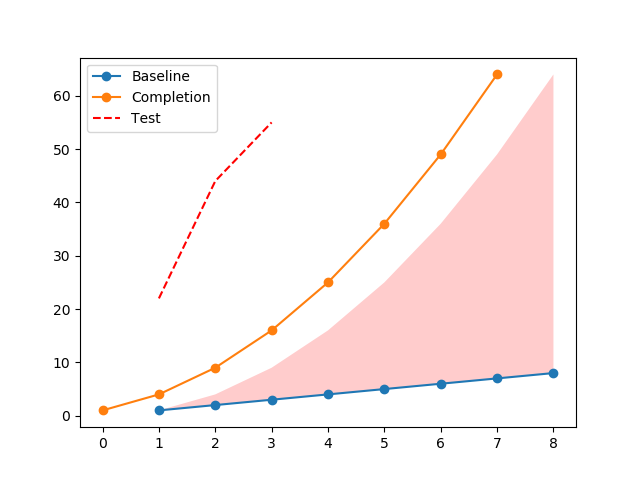

In [22]:
plt.figure()
plt.plot(x,linear_data,'-o',exponential_data, '-o')
plt.plot(x[:3],[22,44,55],'--r')
plt.legend(['Baseline','Completion','Test'])

# 어디를 내가 채우는가
plt.fill_between(x,linear_data,exponential_data,facecolor = 'red', alpha = 0.2)

# Bar Charts

<IPython.core.display.Javascript object>


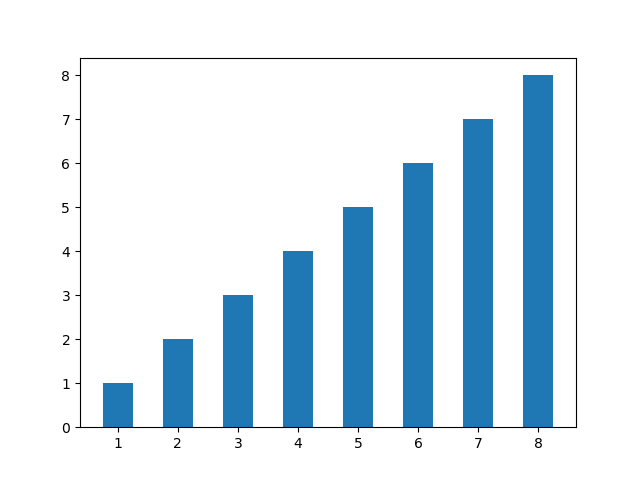

<BarContainer object of 8 artists>

In [23]:
plt.figure()
plt.bar(x,linear_data,width = 0.5)

<IPython.core.display.Javascript object>


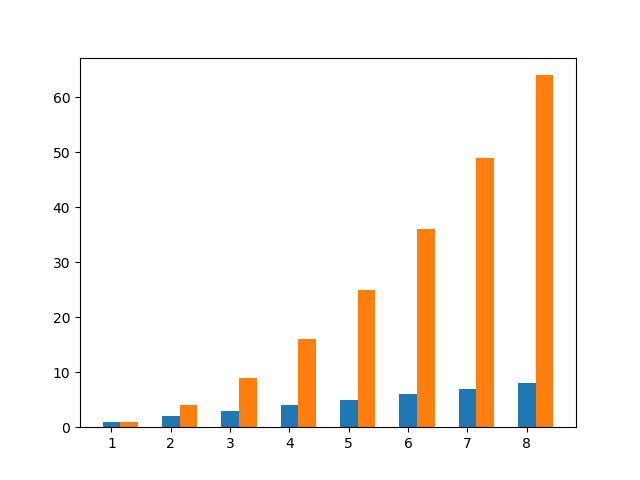

<BarContainer object of 8 artists>

In [24]:
# exponential 데이터 추가하기
# x+3으로 옆으로 bar을 옮긴다.
plt.figure()
plt.bar(x,linear_data,width = 0.3)
plt.bar(x+0.3,exponential_data,width=0.3)

<IPython.core.display.Javascript object>


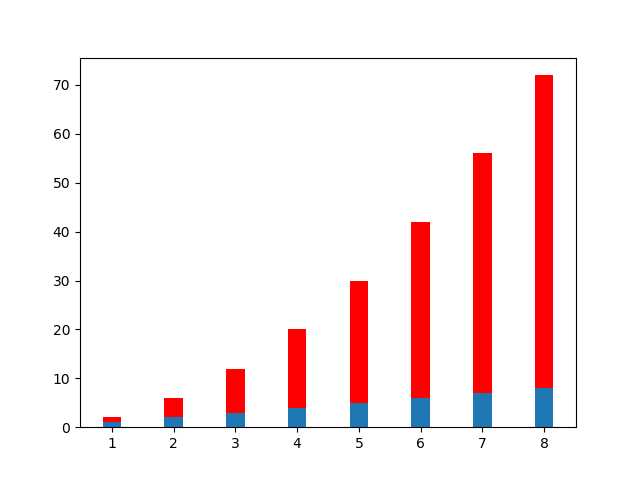

<BarContainer object of 8 artists>

In [25]:
# 그림을 위로 쌓기

plt.figure()
plt.bar(x,linear_data,width = 0.3)
plt.bar(x,exponential_data,bottom = linear_data,width=0.3,color='red')